### Underfitting and overfitting

1. At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, your model is said to be underfit: there is still progress to be made; the network hasn’t yet modeled all relevant patterns in the training data. 
2. But after a certain number of iterations on the training data, generalization stops improving, validation metrics stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the training data, the best solution is to get more training data.
When that isn't possible, the next-best solution is to modulate the quantity of information that the model is allowed to store or to add constraints on what information it's allowed to store. If a network can only afford to to memorize a small number of patterns, the optimization process will forse it to focus on the most prominent patterns.

The processing of figthing overfitting this way is called regularization. 
This is called “regularizing” the model because it tends to make the model simpler, more “regular,” its curve smoother, more “generic”; thus it is less specific to the training set and better able to generalize by more closely approximat- ing the latent manifold of the data.

Let's review some of the most common regularization techniques and apply them in practice to improve the movie-classification model form chapter 3.

##### Reducing the network's size

The simplest way to mitigate overfitting is to reduce the size of the model (the number of learnable parameters in the model, determined by the number of layers and the number of units per layer). If the model has limited memorization resources, it won’t be able to simply memorize its training data; thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets—precisely the type of representations we’re interested in. 
At the same time, keep in mind that we should use models that have enough parameters that they don’t underfit: your model shouldn’t be starved for memorization resources. There is a compromise to be found between too much capacity and not enough capacity.

We're going to compare three models.

In [4]:
# Original model

# Loading the imbd dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #The arguments num_words=10000 means you'll only keep the top 10,000 most frequently occurring words in the training data.

# Encoding the integer sequences nto a binary matrix
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #Creates an all-zero matrix of shape (len(sequences), dimension)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. #Sets specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) #Vectorized training data
x_test = vectorize_sequences(test_data) #Vectorized test data

# We should also vectorize the labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# The model definition
from keras import models 
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation= "relu", input_shape= (10000,)))
model.add(layers.Dense(16, activation= "relu"))
model.add(layers.Dense(1, activation= "sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Configuring the optimizer
history_original = model.fit(x_train,
                            y_train, 
                            epochs=20, 
                            batch_size=512, 
                            validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - acc: 0.7100 - loss: 0.5933 - val_acc: 0.8595 - val_loss: 0.4067
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.8914 - loss: 0.3392 - val_acc: 0.8870 - val_loss: 0.3131
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.9233 - loss: 0.2472 - val_acc: 0.8929 - val_loss: 0.2816
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9401 - loss: 0.1988 - val_acc: 0.8931 - val_loss: 0.2740
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9513 - loss: 0.1646 - val_acc: 0.8922 - val_loss: 0.2758
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - acc: 0.9528 - loss: 0.1447 - val_acc: 0.8822 - val_loss: 0.2962
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9654 - loss: 0.1169 - val_acc: 0.8847 - val_loss: 0.2997
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9705 - loss: 0.1041 - val_acc: 0.8818 - val_loss: 0.3149
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.9777

In [5]:
# Version of the model with lower capacity

# The model definition
model = models.Sequential()
model.add(layers.Dense(4, activation= "relu", input_shape= (10000,)))
model.add(layers.Dense(4, activation= "relu"))
model.add(layers.Dense(1, activation= "sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Configuring the optimizer
history_low = model.fit(x_train,
                        y_train, 
                        epochs=20, 
                        batch_size=512, 
                        validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - acc: 0.5729 - loss: 0.6868 - val_acc: 0.6312 - val_loss: 0.6491
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.6825 - loss: 0.6348 - val_acc: 0.7536 - val_loss: 0.6020
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.7496 - loss: 0.5862 - val_acc: 0.7805 - val_loss: 0.5628
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - acc: 0.7959 - loss: 0.5484 - val_acc: 0.8046 - val_loss: 0.5324
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8331 - loss: 0.5093 - val_acc: 0.8357 - val_loss: 0.5080
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.8555 - loss: 0.4824 - val_acc: 0.8183 - val_loss: 0.4911
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8752 - loss: 0.4609 - val_acc: 0.8319 - val_loss: 0.4755
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.8886 - loss: 0.4372 - val_acc: 0.8493 - val_loss: 0.4604
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.903

In [6]:
# Version of the model with higher capacity

# The model definition
model = models.Sequential()
model.add(layers.Dense(512, activation= "relu", input_shape= (10000,)))
model.add(layers.Dense(512, activation= "relu"))
model.add(layers.Dense(1, activation= "sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Configuring the optimizer
history_high = model.fit(x_train,
                         y_train, 
                         epochs=20, 
                         batch_size=512, 
                         validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 628ms/step - acc: 0.6374 - loss: 0.6542 - val_acc: 0.7304 - val_loss: 0.5239
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - acc: 0.8451 - loss: 0.3577 - val_acc: 0.8661 - val_loss: 0.3129
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 236ms/step - acc: 0.9016 - loss: 0.2428 - val_acc: 0.8564 - val_loss: 0.3388
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - acc: 0.9337 - loss: 0.1792 - val_acc: 0.8549 - val_loss: 0.3779
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - acc: 0.9541 - loss: 0.1259 - val_acc: 0.8864 - val_loss: 0.2849
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 229ms/step - acc: 0.9710 - loss: 0.0898 - val_acc: 0.8848 - val_loss: 0.3287
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 225ms/step - acc: 0.9752 - loss: 0.0764 - val_acc: 0.8843 - val_loss: 0.3790
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 222ms/step - acc: 0.9827 - loss: 0.0580 - val_acc: 0.8858 - val_loss: 0.3656
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 227ms/step -

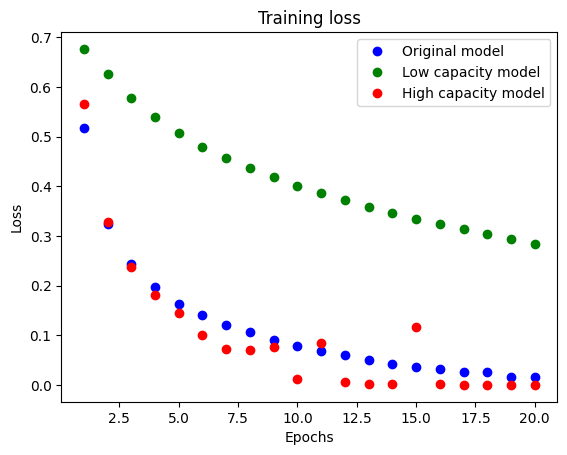

In [11]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

original_loss = history_original.history["loss"]
low_loss = history_low.history["loss"]
high_loss = history_high.history["loss"]

epochs = range(1, len(original_loss) + 1)

plt.plot(epochs, original_loss, "bo", label="Original model")
plt.plot(epochs, low_loss, "go", label="Low capacity model")
plt.plot(epochs, high_loss, "ro", label="High capacity model")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

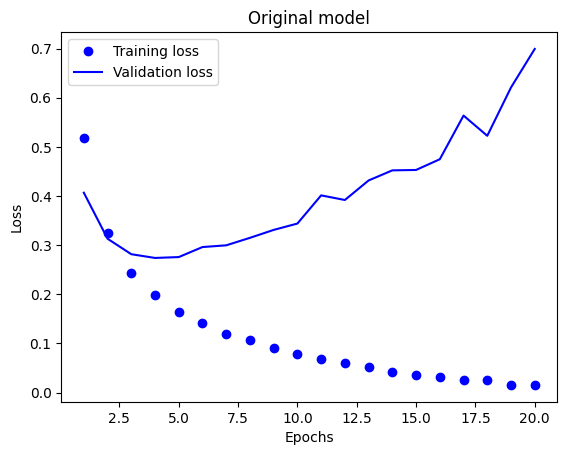

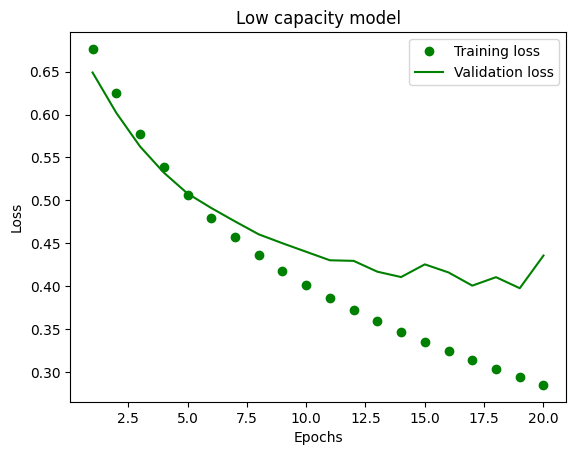

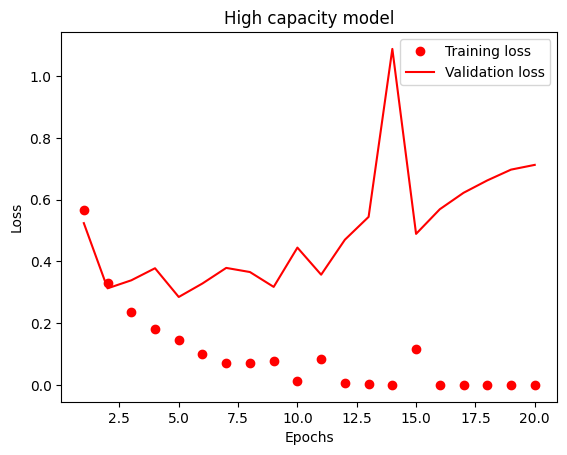

In [13]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

original_loss = history_original.history["loss"]
low_loss = history_low.history["loss"]
high_loss = history_high.history["loss"]

original_val_loss = history_original.history["val_loss"]
low_val_loss = history_low.history["val_loss"]
high_val_loss = history_high.history["val_loss"]

epochs = range(1, len(original_loss) + 1)

plt.plot(epochs, original_loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, original_val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Original model")
plt.show()

plt.plot(epochs, low_loss, "go", label="Training loss") # "go" is for "green dot"
plt.plot(epochs, low_val_loss, "g", label="Validation loss") # "g" is for "solid green line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Low capacity model")
plt.legend()
plt.show()

plt.plot(epochs, high_loss, "ro", label="Training loss") # "ro" is for "red dot"
plt.plot(epochs, high_val_loss, "r", label="Validation loss") # "r" is for "solid red line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("High capacity model")
plt.legend()
plt.show()

- As you can see, the smaller network starts overfitting later than the reference network (after six epochs rather than four), and its performance over the validation samples degrades more slowly once it starts overfitting.
- Meanwhile, the biggest network starts to overfitting almost immediately, after just two epochs, and it overfits much more severely. Its validation loss is also noisier. Moreover, the bigger network gets its training loss near to zero very quickly.



##### Adding weight regularization

A common way to mitigate overfitting is to put constraints on the complexity of a model by forcing its weights to take only small values, which makes the distribution of weight values more regular. This is called weight regularization, and it’s done by adding to the loss function of the model a cost associated with having large weights. This cost comes in two flavors:
- L1 regularization—The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
- L2 regularization—The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights).

Let’s add L2 weight regularization to our initial movie-review classification model.

In [14]:
# Adding L2 weight regularization to the model
from keras import regularizers

# The model definition
model = models.Sequential()

model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu", input_shape= (10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.002), activation= "relu"))
model.add(layers.Dense(1, activation= "sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Configuring the optimizer
history_l2 = model.fit(x_train,
                       y_train, 
                       epochs=20, 
                       batch_size=512, 
                       validation_split=0.4)

/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 153ms/step - acc: 0.6936 - loss: 0.7123 - val_acc: 0.8547 - val_loss: 0.5166
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - acc: 0.8819 - loss: 0.4649 - val_acc: 0.8753 - val_loss: 0.4206
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9096 - loss: 0.3658 - val_acc: 0.8850 - val_loss: 0.3807
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9260 - loss: 0.3154 - val_acc: 0.8822 - val_loss: 0.3740
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9285 - loss: 0.2975 - val_acc: 0.8826 - val_loss: 0.3710
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9355 - loss: 0.2740 - val_acc: 0.8822 - val_loss: 0.3734
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9428 - loss: 0.2584 - val_acc: 0.8802 - val_loss: 0.3772
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - acc: 0.9445 - loss: 0.2491 - val_acc: 0.8800 - val_loss: 0.3746
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.952

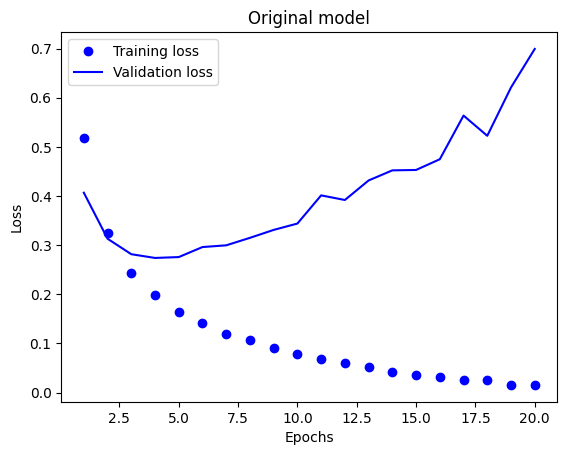

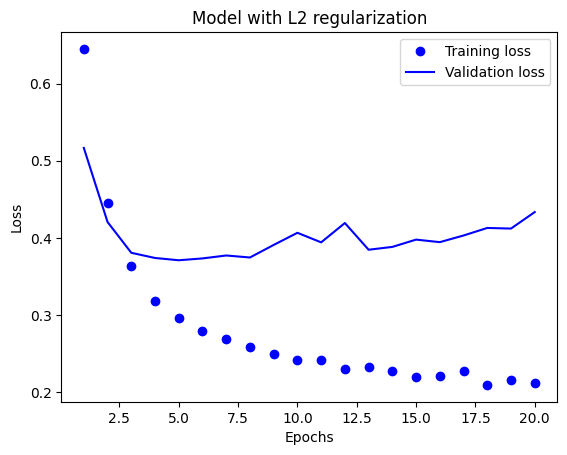

In [15]:
# Comparing the models

# Plotting the training and validation loss of the original model
import matplotlib.pyplot as plt

original_val_loss = history_original.history["val_loss"]
original_loss = history_original.history["loss"]

epochs = range(1, len(original_loss) + 1)

plt.plot(epochs, original_loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, original_val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Original model")
plt.show()

# Plotting the training and validation loss of the model with L2 regularization
import matplotlib.pyplot as plt

l2_val_loss = history_l2.history["val_loss"]
l2_loss = history_l2.history["loss"]

epochs = range(1, len(l2_loss) + 1)

plt.plot(epochs, l2_loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, l2_val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model with L2 regularization")
plt.show()

As you can see, the model with L2 regularization has become much more resistant to overfitting than the reference model, even though both models have the same number of parameters.

##### Adding dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks.
Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.

The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that aren’t significant which the model will start memorizing if no noise is present.

Let’s add two Dropout layers in the IMDB model to see how well they do at reducing overfitting.

In [16]:
# Adding dropout to the IMDB model
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

# Compiling the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

# Configuring the optimizer
history_dropout = model.fit(x_train,
                            y_train, 
                            epochs=20, 
                            batch_size=512, 
                            validation_split=0.4)

/Users/letizialibrobuono/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - acc: 0.5901 - loss: 0.6606 - val_acc: 0.8345 - val_loss: 0.5535
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.7741 - loss: 0.5428 - val_acc: 0.8300 - val_loss: 0.4737
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - acc: 0.8449 - loss: 0.4817 - val_acc: 0.8794 - val_loss: 0.4220
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.8681 - loss: 0.4297 - val_acc: 0.8753 - val_loss: 0.3927
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.8870 - loss: 0.3919 - val_acc: 0.8843 - val_loss: 0.3623
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - acc: 0.9110 - loss: 0.3448 - val_acc: 0.8863 - val_loss: 0.3456
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9232 - loss: 0.3114 - val_acc: 0.8830 - val_loss: 0.3559
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.9268 - loss: 0.2842 - val_acc: 0.8862 - val_loss: 0.3279
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.938

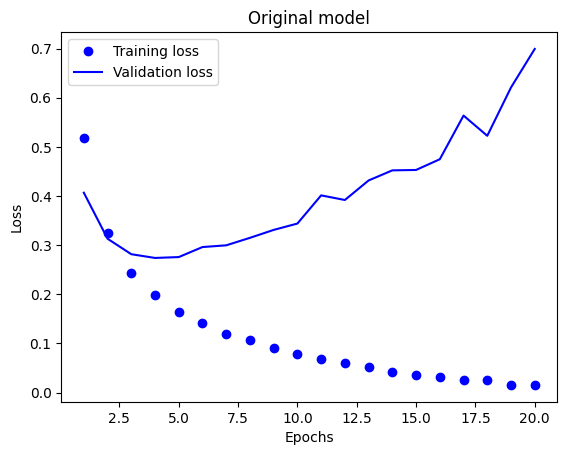

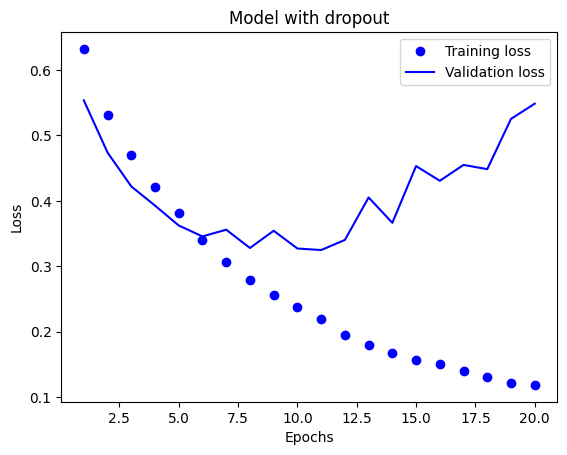

In [17]:
# Compering the models

# Plotting the training and validation loss of the original model
import matplotlib.pyplot as plt

original_val_loss = history_original.history["val_loss"]
original_loss = history_original.history["loss"]

epochs = range(1, len(original_loss) + 1)

plt.plot(epochs, original_loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, original_val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Original model")
plt.show()

# Plotting the training and validation loss of the model with dropout
import matplotlib.pyplot as plt

dropout_val_loss = history_dropout.history["val_loss"]
dropout_loss = history_dropout.history["loss"]

epochs = range(1, len(dropout_loss) + 1)

plt.plot(epochs, dropout_loss, "bo", label="Training loss") # "bo" is for "blue dot"
plt.plot(epochs, dropout_val_loss, "b", label="Validation loss") # "b" is for "solid blue line"
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model with dropout")
plt.show()